# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [57]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

import nltk
nltk.download('stopwords')

sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16302\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
# change `data_location` to the location of the folder on your machine.
data_location = "M1 Results"
# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [73]:
from collections import Counter

def descriptive_stats(text, verbose=True, num_tokens=None):
    # If input is a list (e.g., cleaned tokens), join into string
    if isinstance(text, list):
        text = " ".join(text)

    # Tokenize the input string into words
    tokens = text.split()

    # Optionally limit the number of tokens
    if num_tokens is not None:
        tokens = tokens[:num_tokens]

    num_tokens_total = len(tokens)
    unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = unique_tokens / num_tokens_total if num_tokens_total > 0 else 0

    top_5 = Counter(tokens).most_common(5)

    if verbose:
        print(f"There are {num_tokens_total} tokens in the data.")
        print(f"There are {unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f}.")
        print("Top 5 words:", top_5)

    return [num_tokens_total, unique_tokens, num_characters, lexical_diversity, top_5]



In [74]:
text = """here is some example text with other example text here in this text"""
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(descriptive_stats(text, verbose=False)[2] == 55)
assert(abs(descriptive_stats(text, verbose=False)[3] - 0.69) < 0.02)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692.
Top 5 words: [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: This is important so that it helps ensure that issues in your code are detected during execution.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [75]:
# Read in the lyrics data
from collections import defaultdict

lyrics_path = os.path.join(data_location, lyrics_folder)
lyrics_data = defaultdict(dict)

# This loops through artists folder
for item in os.listdir(lyrics_path):
    item_path = os.path.join(lyrics_path, item)
    #This loops through Lyrics files
    if os.path.isdir(item_path):
        for lyric_page in os.listdir(item_path):
            artist,song = lyric_page.split("_",1)
            song = os.path.splitext(song)[0]
            file_path = os.path.join(item_path, lyric_page)
            
            # Read and store the lyrics
            with open(file_path, "r", encoding="utf-8") as f:
                lyrics_data[item][song] = f.read()

In [76]:

twitter_path = os.path.join(data_location, twitter_folder)

# Check path before doing anything
if not os.path.exists(twitter_path):
    print("Twitter folder not found:", twitter_path)
else:
    # Read in the twitter data
    twitter_files = os.listdir(twitter_path)
    desc_files = [f for f in twitter_files if "followers_data" in f]

    twitter_data = defaultdict(list)

    for f in desc_files:
        artist = f.split("_")[0]
        file_path = os.path.join(twitter_path, f)

        # Open and process the file (example: read lines)
        with open(file_path, "r", encoding="utf-8") as file:
            twitter_data[artist].extend(file.readlines())

len(twitter_data['cher'])

3994804

In [77]:
from collections import defaultdict
import os

lyrics_path = os.path.join(data_location, lyrics_folder)
lyrics_data = defaultdict(dict)

# Loop through each artist's folder
for item in os.listdir(lyrics_path):
    item_path = os.path.join(lyrics_path, item)
    
    if os.path.isdir(item_path):
        # Loop through each lyrics file
        for lyric_page in os.listdir(item_path):
            artist, song = lyric_page.split("_", 1)  # Safer in case of multiple underscores
            song = os.path.splitext(song)[0]         # Safely strip ".txt"
            file_path = os.path.join(item_path, lyric_page)

            # Read and store the lyrics
            with open(file_path, "r", encoding="utf-8") as f:
                lyrics_data[item][song] = f.read()

robyn_lyrics = " ".join(lyrics_data['robyn'].values())
cher_lyrics = " ".join(lyrics_data['cher'].values())

descriptive_stats(robyn_lyrics, verbose=True)
descriptive_stats(cher_lyrics, verbose=True)


There are 29318 tokens in the data.
There are 3308 unique tokens in the data.
There are 117270 characters in the data.
The lexical diversity is 0.113.
Top 5 words: [('you', 1216), ('I', 831), ('the', 811), ('me', 659), ('to', 640)]
There are 70097 tokens in the data.
There are 6039 unique tokens in the data.
There are 274296 characters in the data.
The lexical diversity is 0.086.
Top 5 words: [('I', 2649), ('you', 2211), ('the', 2131), ('to', 1534), ('a', 1230)]


[70097,
 6039,
 274296,
 0.0861520464499194,
 [('I', 2649), ('you', 2211), ('the', 2131), ('to', 1534), ('a', 1230)]]

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [78]:
punctuation = set(punctuation) # speeds up comparison

In [65]:
import string
# create your clean twitter data here

sw = set(stopwords.words("english"))
punctuation = set(string.punctuation)

# Dictionary to store cleaned twitter data
descs_processed = defaultdict(list)

for artist in twitter_data:
    # Join all tweets for that artist into one string
    descriptions = " ".join(twitter_data[artist])

    # Remove punctuation
    descriptions = "".join([ch for ch in descriptions if ch not in punctuation])

    # Lowercase and tokenize
    tokens = [item.lower().strip() for item in descriptions.split()]

    # Remove stopwords
    tokens = [item for item in tokens if item not in sw]

    # Store processed tokens
    descs_processed[artist].extend(tokens)


In [82]:
descriptive_stats(descs_processed['cher'], num_tokens=10)

There are 10 tokens in the data.
There are 10 unique tokens in the data.
There are 78 characters in the data.
The lexical diversity is 1.000.
Top 5 words: [('screenname', 1), ('name', 1), ('id', 1), ('location', 1), ('followerscount', 1)]


[10,
 10,
 78,
 1.0,
 [('screenname', 1),
  ('name', 1),
  ('id', 1),
  ('location', 1),
  ('followerscount', 1)]]

In [83]:
descriptive_stats(descs_processed['robynkonichiwa'], num_tokens=10)

There are 10 tokens in the data.
There are 10 unique tokens in the data.
There are 98 characters in the data.
The lexical diversity is 1.000.
Top 5 words: [('screenname', 1), ('name', 1), ('id', 1), ('location', 1), ('followerscount', 1)]


[10,
 10,
 98,
 1.0,
 [('screenname', 1),
  ('name', 1),
  ('id', 1),
  ('location', 1),
  ('followerscount', 1)]]

In [85]:
# create your clean lyrics data here

sw = set(stopwords.words("english"))
punctuation = set(string.punctuation)

# Dictionary to store cleaned lyrics data
lyrics_processed = defaultdict(list)

for artist in lyrics_data:
    for song in lyrics_data[artist]:
        # Remove punctuation
        lyrics = "".join([ch for ch in lyrics_data[artist][song] if ch not in punctuation])

        # Tokenize
        tokens = [w.lower().strip() for w in lyrics.split()]
        tokens = [w for w in tokens if w not in sw]
        
        # Store processed tokens
        lyrics_processed[artist].extend(tokens)


In [86]:
descriptive_stats(lyrics_processed['robyn'], num_tokens=10)

There are 10 tokens in the data.
There are 10 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 1.000.
Top 5 words: [('88', 1), ('days', 1), ('light', 1), ('candle', 1), ('morning', 1)]


[10,
 10,
 55,
 1.0,
 [('88', 1), ('days', 1), ('light', 1), ('candle', 1), ('morning', 1)]]

In [87]:
descriptive_stats(lyrics_processed['cher'],num_tokens=10)

There are 10 tokens in the data.
There are 10 unique tokens in the data.
There are 47 characters in the data.
The lexical diversity is 1.000.
Top 5 words: [('88', 1), ('degrees', 1), ('stuck', 1), ('la', 1), ('aint', 1)]


[10,
 10,
 47,
 1.0,
 [('88', 1), ('degrees', 1), ('stuck', 1), ('la', 1), ('aint', 1)]]

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [89]:
# calls to descriptive_stats here
print("Lyrics keys:", lyrics_data.keys())
print("Twitter keys:", twitter_data.keys())

# Combine lyrics data per artist
robyn_lyrics = " ".join(lyrics_processed['robyn'])
cher_lyrics = " ".join(lyrics_processed['cher'])

# Combine Twitter data per artist
robyn_tweets = " ".join(descs_processed['robynkonichiwa'])
cher_tweets = " ".join(descs_processed['cher'])

# Call descriptive_stats on each
print("Robyn Lyrics:")
descriptive_stats(robyn_lyrics, verbose=True)

print("\nRobyn Twitter:")
descriptive_stats(robyn_tweets, verbose=True)

print("\nCher Lyrics:")
descriptive_stats(cher_lyrics, verbose=True)

print("\nCher Twitter:")
descriptive_stats(cher_tweets, verbose=True)


Lyrics keys: dict_keys(['cher', 'robyn'])
Twitter keys: dict_keys(['cher', 'robynkonichiwa'])
Robyn Lyrics:
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142.
Top 5 words: [('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 251)]

Robyn Twitter:
There are 3888265 tokens in the data.
There are 1136751 unique tokens in the data.
There are 24106279 characters in the data.
The lexical diversity is 0.292.
Top 5 words: [('0', 31800), ('1', 24115), ('2', 17675), ('music', 16049), ('3', 14372)]

Cher Lyrics:
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103.
Top 5 words: [('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333)]

Cher Twitter:
There are 42404149 tokens in the data.
There are 10667109 unique tokens in the data.
There are 266424726 characters in the da

[42404149,
 10667109,
 266424726,
 0.2515581435203428,
 [('0', 334292),
  ('1', 284601),
  ('2', 237886),
  ('love', 221728),
  ('3', 196690)]]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we left stopwords in the data, the top 5 words would probably be common words like "the", "and", or "is". These words show up a lot in English but don’t tell us much about the meaning or style of the lyrics or tweets. Removing stopwords helps us see more interesting and meaningful words that better reflect what the artist is really saying.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I expected the it to be different between Robyn and Cher, since they have different styles. I thought Robyn might have slightly higher diversity because her lyrics often seem more unusal. The results mostly confirm that, with Robyn’s lyrics having a slightly higher lexical diversity than Cher’s. On Twitter, both artists had much higher diversity overall, but Robyn still showed slightly more variety in her word use, which fits with my expectations.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [90]:
import emoji

assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [91]:
# Your code here
def extract_emojis(text):
    return [ch for ch in text if ch in emoji.EMOJI_DATA]

# Get top 10 emojis by artist
emoji_counts = {}

for artist in twitter_data:
    all_text = " ".join(twitter_data[artist])
    emojis = extract_emojis(all_text)
    emoji_counts[artist] = Counter(emojis).most_common(10)

# Example output
for artist, top_emojis in emoji_counts.items():
    print(f"{artist}: {top_emojis}")

cher: [('❤', 94506), ('🌈', 66291), ('♥', 48059), ('🏳', 47174), ('✨', 45846), ('🌊', 31234), ('💙', 31050), ('🏻', 25195), ('✌', 21963), ('💜', 21571)]
robynkonichiwa: [('🌈', 6086), ('❤', 5635), ('🏳', 4641), ('♥', 4249), ('✨', 3217), ('🏻', 1751), ('✌', 1495), ('♀', 1347), ('🏼', 1340), ('💙', 1200)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [92]:
# Your code here
hashtag_counts = {}

for artist in twitter_data:
    all_text = " ".join(twitter_data[artist])
    hashtags = [word.lower() for word in all_text.split() if word.startswith('#')]
    hashtag_counts[artist] = Counter(hashtags).most_common(10)

# Display results
for artist, top_tags in hashtag_counts.items():
    print(f"\nTop 10 hashtags for {artist}:")
    for tag, count in top_tags:
        print(f"{tag}: {count}")


Top 10 hashtags for cher:
#resist: 9729
#blm: 9271
#blacklivesmatter: 7770
#fbr: 2991
#theresistance: 2929
#1: 2580
#resistance: 2438
#: 2205
#voteblue: 1939
#lgbtq: 1461

Top 10 hashtags for robynkonichiwa:
#blacklivesmatter: 601
#blm: 365
#music: 262
#1: 213
#: 175
#teamfollowback: 118
#edm: 104
#resist: 77
#freebritney: 70
#blacktranslivesmatter: 58


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [93]:
# Your code here

title_word_counts = {}

for artist in lyrics_data:
    titles = lyrics_data[artist].keys()  # Get all song titles for this artist
    words = " ".join(titles).lower().split()  # Combine and split titles into words
    title_word_counts[artist] = Counter(words).most_common(5)

# Display results
for artist, top_words in title_word_counts.items():
    print(f"\nTop 5 words in song titles for {artist}:")
    for word, count in top_words:
        print(f"{word}: {count}")



Top 5 words in song titles for cher:
88degrees: 1
adifferentkindoflovesong: 1
afterall: 1
again: 1
alfie: 1

Top 5 words in song titles for robyn:
88days: 1
aintnothing: 1
anytimeyoulike: 1
babyforgiveme: 1
beach2k20: 1


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy.  


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list to store each song's artist and length
song_length_data = []

for artist in lyrics_data:
    for song_title in lyrics_data[artist]:
        # Count tokens in the song (basic .split on whitespace)
        lyrics = lyrics_data[artist][song_title]
        num_tokens = len(lyrics.split())
        song_length_data.append({'artist': artist, 'song_length': num_tokens})

# Convert to a DataFrame
song_lengths_df = pd.DataFrame(song_length_data)

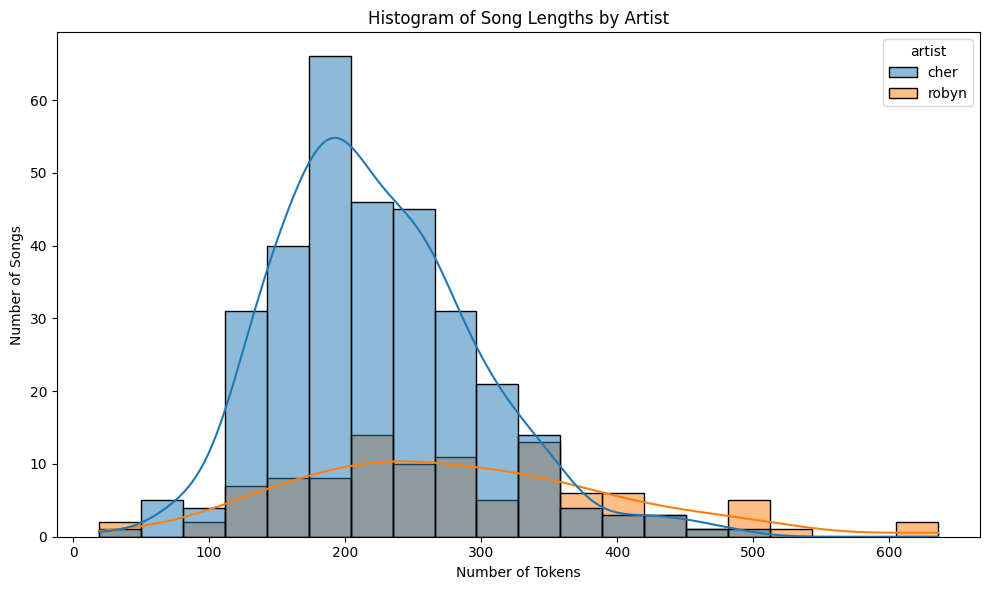

In [96]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=song_lengths_df, x='song_length', hue='artist', kde=True, bins=20)
plt.title("Histogram of Song Lengths by Artist")
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression \s+ matches one or more whitespace characters including spaces, tabs (\t), newlines (\n), and carriage returns (\r). It's often used to collapse multiple whitespace characters into a single space or to split text into words, regardless of how the text is spaced or formatted.
